# [1] pandas

## (1) DataFrame 이해하기

- 여러 도메인(금융, 의료, 과학, 스포츠, 여행 콘텐츠 등)의 데이터를 사용하여 pandas로 데이터 프레임을 다룰 수 있다.

| 컬럼명               | 설명                                                |
|----------------------|-----------------------------------------------------|
| loan_id              | 대출을 구분하는 고유 ID                             |
| married_or_not       | 신청자의 결혼 여부 (Y: 기혼, N: 미혼)               |
| self_employed_or_not | 자영업 여부 (Y: 자영업, N: 비자영업)                |
| applicant_income     | 신청자의 월 소득        |
| loan_amount          | 대출 금액   |
| property_area        | 주택/부동산 위치 (예: Rural, City 등)               |
| loan_status          | 대출 승인 여부 (Y: 승인, N: 거절)                   |

In [7]:
# 라이브러리 불러오기
import pandas as pd

In [8]:
# 데이터 불러오기
loan_df = pd.read_csv('/content/loan.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/loan.csv'

- `head()`: 데이터 프레임의 첫 5행을 가져오기

In [ ]:
loan_df.head()

- `tail()`: 데이터 프레임의 마지막 5행을 가져오기

In [ ]:
loan_df.tail()

- `shape`: 데이터 프레임의 행과 열의 수 확인하기

In [ ]:
loan_df.shape

- `dtypes`: 데이터프레임 안 각 컬럼의 자료형(데이터 타입) 확인하기

In [ ]:
loan_df.dtypes

- `type()`: 객체 자체가 어떤 클래스인지 확인하기

In [ ]:
type(loan_df)

- `info()`: 데이터프레임의 행과 열의 수, 컬럼명, 결측값 여부, 데이터 타입 확인하기

In [ ]:
loan_df.info()

- `describe()`: 수치형 데이터의 기술 통계(예. 평균, 중앙값, 최솟값, 최댓값, 사분위수, 표준편차 등) 확인하기

In [9]:
loan_df.describe()

NameError: name 'loan_df' is not defined

- `describe(include='all')`: 문자형 데이터까지 포함하여 최빈값을 포함한 기술 통계량 확인하기
  - `unique`은 범주의 개수, `top`은 최빈값, `freq`은 최빈값이 등장하는 개수

In [ ]:
loan_df.describe(include='all')

- `sort_values()`: 정렬
  - `ascending=True`: 오름차순(기본값)
  - `ascending=False`: 내림차순

In [ ]:
loan_df.sort_values(by='loan_amount')

In [ ]:
loan_df.sort_values(by='loan_amount', ascending=False)

## (2) 엑셀 파일 불러오기

- 엑셀에는 `.csv` 확장자 파일과 `.xlsx` 확장자 파일이 있는데, `csv`는 `comma separated values`로 콤마(`,`) 구분자로 구분된 파일이다.
- `.csv` 파일은 `pandas`의 `read_csv()`로 불러올 수 있고, `.xlsx` 파일은 `pandas`의 `read_excel()`로 불러올 수 있다.

In [ ]:
# 데이터 불러오기
df = pd.read_excel('/content/loan.xlsx')
df.head()

In [ ]:
# 데이터 불러오기
df = pd.read_excel('/content/loan.xlsx', sheet_name=0)
df.head()

In [10]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel._base:

read_excel(io, sheet_name: 'str | int | list[IntStrT] | None' = 0, *, header: 'int | Sequence[int] | None' = 0, names: 'SequenceNotStr[Hashable] | range | None' = None, index_col: 'int | str | Sequence[int] | None' = None, usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None, dtype: 'DtypeArg | None' = None, engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb', 'calamine'] | None" = None, converters: 'dict[str, Callable] | dict[int, Callable] | None' = None, true_values: 'Iterable[Hashable] | None' = None, false_values: 'Iterable[Hashable] | None' = None, skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, parse_dates: 'list | dict | bool' = False, date_parser: 'Callable | lib.NoDefault' = <no_default>, date_format: 'dict[Hashable, str] | str

In [11]:
# 데이터 불러오기
df = pd.read_excel('/content/loan.xlsx', sheet_name=1, header=3, usecols='B:H')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/loan.xlsx'

In [ ]:
# 데이터 불러오기
df = pd.read_excel('/content/loan.xlsx', sheet_name=1, header=3, usecols=[1, 2, 3, 4, 5, 6, 7])
df.head()

In [ ]:
# 데이터 불러오기
df = pd.read_excel('/content/loan.xlsx', sheet_name=1, header=3, usecols=range(1, 8))
df.head()

## (3) 인덱스 설정하기

- `set_index()` : 데이터 프레임의 특정 컬럼을 행 인덱스로 설정하여 데이터 조회와 탐색을 직관적으로 하기 위하여 자주 사용하고, 주로 고유한 식별자가 있을 때 사용한다.

In [ ]:
df['loan_id'].count()

In [ ]:
df['loan_id'].nunique()

In [ ]:
df['loan_id'].isna().sum()  # df['loan_id'].isnull().sum()

In [ ]:
df.set_index('loan_id')

In [ ]:
df

- `inplace=True`: 원본에 바로 적용 가능

In [ ]:
# df = df.set_index('loan_id')

In [ ]:
df.set_index('loan_id', inplace=True)

In [ ]:
df

- `reset_index()`: 설정한 인덱스를 해제하고 싶은 경우에 사용

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

## (4) 컬럼명 설정하기

(방법1: `.columns` 사용)

- `.columns`: 컬럼명을 출력하고 싶은 경우

In [ ]:
df.columns

- `married` 컬럼을 `married_or_not`으로, `self_employed` 컬럼을 `self_employed_or_not`으로 컬럼명 변경

In [ ]:
df.columns = ['loan_id', 'married_or_not', 'self_employed_or_not', 'applicant_income', 'loan_amount', 'property_area', 'loan_status']

In [ ]:
df

(방법2: `rename()` 사용)

- 딕셔너리를 활용해서 바꿔야할 컬럼명에 대해서만 지정해줄 수 있다.

- `married_or_not` 컬럼을 `married`로 변경, `self_employed_or_not` 컬럼을 `self_employed`로 변경, `applicant_income` 컬럼을 `income`으로 변경, `loan_amount` 컬럼을 `amount`로 변경

In [ ]:
df.columns

In [ ]:
new_columns = {'married_or_not' : 'married',
               'self_employed_or_not' : 'self_employed',
               'applicant_income' : 'income',
               'loan_amount' : 'amount'}

In [ ]:
df.rename(columns=new_columns, inplace=True)

In [ ]:
df

## (5) 데이터 타입 설정하기

In [ ]:
df.dtypes

- `income`이라는 컬럼이 정수형(`int`)으로 들어가있는데, 실수형(`floating point`)으로 변경할 수 있다.

In [ ]:
df['income'] = df['income'].astype(float)

In [12]:
df['income'].dtype

KeyError: 'income'

- `income`이라는 컬럼이 실수형(`floating point`)으로 들어가있는데, 정수형(`int`)으로 변경할 수 있다.

In [ ]:
df['income'] = df['income'].astype(int)

In [ ]:
df['income'].dtype

- `income`이라는 컬럼이 정수형(`int`)으로 들어가있는데, 문자형(`str`)으로 변경할 수 있다.
- 문자형으로 바꿀 때는 str을 사용해도 되고, object를 사용해도 된다.

In [ ]:
df['income'] = df['income'].astype(str)

In [ ]:
df['income'].dtype

In [ ]:
df['income'] = df['income'].astype(int)
df['income'].dtype

In [ ]:
df['income'] = df['income'].astype(object)
df['income'].dtype

### 실습) DataFrame 살펴보기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6590)

## (6) Series 살펴보기

In [ ]:
df.set_index('loan_id', inplace=True)

In [ ]:
df.head()

In [ ]:
df['amount']

In [ ]:
type(df['amount'])

In [ ]:
pd.Series([10, 'apple', True], index=['a', 'b', 'c'])

## (7) 문자형 데이터에 쓰기 좋은 함수들

- `unique()`: 범주의 종류

In [ ]:
df['self_employed'].unique()

- `value_counts()` : 범주별 도수
  - `dropna=True` : 결측값 제외(기본값)
  - `dropna=False` : 결측값 포함
  - `normalize=True` : 범주별 비율

In [ ]:
df['self_employed'].value_counts()

In [ ]:
df['self_employed'].value_counts(dropna=False)

In [ ]:
df['self_employed'].value_counts(normalize=True)

In [ ]:
df['self_employed'].value_counts(dropna=False, normalize=True)

In [ ]:
type(df['amount'])

In [ ]:
type(df[['amount']])

In [13]:
type(df[['amount', 'income']])

KeyError: "None of [Index(['amount', 'income'], dtype='object')] are in the [columns]"

### 실습) Series 살펴보기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6605)

In [ ]:
import pandas as pd

loan_df = pd.read_csv('/content/loan.csv')
loan_df.head()

In [ ]:
loan_df = loan_df.set_index('loan_id')
new_columns = {'married_or_not': 'married',
               'self_employed_or_not': 'self_employed',
               'applicant_income': 'income',
               'loan_amount': 'amount'}
loan_df = loan_df.rename(columns=new_columns)
loan_df.head()

In [ ]:
loan_df['property_area'].value_counts(normalize=True)

## (8) 여러 조건으로 불린 인덱싱하기

- 인덱싱(`indexing`) : 데이터에서 원하는 부분을 선택하는 것
- `iloc`(`integer location`) : 숫자 위치를 기준으로 인덱싱
- `loc`(`label location`) : 인덱스 이름(레이블)을 기준으로 인덱싱
- 불린 인덱싱 : 조건(`True/False`)에 따라 데이터를 필터링
- 다중 조건 인덱싱 : 여러 조건을 조합, `AND(&)`, `OR(|)`, `NOT(~)`
  - 논리 연산자에는 크게 `AND`, `OR`, `NOT`이 있는데 각 논리 연산자의 우선 순위는 `NOT > AND > OR`이다.

In [ ]:
df.head()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             713 non-null    object 
 1   state          713 non-null    object 
 2   guests         713 non-null    int64  
 3   beds           713 non-null    int64  
 4   property_type  713 non-null    object 
 5   rating         700 non-null    float64
 6   n_reviews      713 non-null    int64  
 7   location       713 non-null    object 
 8   price          713 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 50.3+ KB


(예시1) 결혼을 했**고**, 수입이 평균보다 큰 경우

In [15]:
# 결혼에 대한 조건
condition1 = (df['married'] == 'Y')

KeyError: 'married'

In [ ]:
# 수입에 대한 조건
df['income'] = df['income'].astype(float)
condition2 = (df['income'] > df['income'].mean())

In [ ]:
df['income'].mean()

In [ ]:
df[condition1 & condition2]

In [ ]:
df[condition1 & condition2]['married'].unique()

In [ ]:
df[condition1 & condition2]['income'].min()

(예시2) 결혼을 했**거나**, 수입이 평균보다 큰 경우

In [ ]:
condition1 = (df['married'] == 'Y')
condition2 = (df['income'] > df['income'].mean())

In [ ]:
df[condition1 | condition2]

In [16]:
df[(df['married'] == 'Y') | (df['income'] > df['income'].mean())]

KeyError: 'married'

(예시3) 결혼을 했**거나**, 수입이 전체 평균보다 크**고**, 부동산이 도시에 있지 않은 경우

In [ ]:
# 결혼에 대한 조건
condition1 = (df['married'] == 'Y')

In [ ]:
# 수입에 대한 조건
condition2 = (df['income'] > df['income'].mean())

In [ ]:
# 부동산에 대한 조건
condition3 = (df['property_area'] == 'City')

In [ ]:
df[condition1 | condition2 & ~condition3]

(예시3) 1) 결혼을 했거나 2) 수입이 전체 평균보다 크고, 부동산이 도시에 있지 않은 경우

In [ ]:
df[condition1 | (condition2 & ~condition3)]

### 실습) 여러 개의 조건으로 불린 인덱싱하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6607)

- 대출이 승낙된 사람들 중에서 자영업자가 아니고, 수입이 중간값 이상인 사람들

In [17]:
import pandas as pd

loan_df = pd.read_csv('/content/loan.csv')
loan_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/loan.csv'

In [18]:
loan_df = loan_df.set_index('loan_id')
new_columns = {'married_or_not': 'married',
               'self_employed_or_not': 'self_employed',
               'applicant_income': 'income',
               'loan_amount': 'amount'}
loan_df = loan_df.rename(columns=new_columns)
loan_df.head()

NameError: name 'loan_df' is not defined

In [ ]:
# 대출이 승낙된 사람들 중에서 자영업자가 아니고, 수입이 중간값 이상인 사람들

In [ ]:
# 대출에 대한 조건
condition1 = (loan_df['loan_status'] == 'Y')

In [ ]:
# 자영업자에 대한 조건
condition2 = (loan_df['self_employed'] == 'N')

In [ ]:
# 수입에 대한 조건
condition3 = (loan_df['income'] >= loan_df['income'].median())

In [ ]:
loan_df[condition1 & condition2 & condition3]

## (9) query() 함수로 불린 인덱싱하기

- `query()`: DataFrame에서 조건식을 문자열로 작성해 행을 필터링

**작성**

- `df.query('조건식')`

**기능**

- 문자열 조건식을 사용해 행(row)을 필터링
- 불린 인덱싱보다 코드가 짧고 가독성이 좋음
- 여러 조건 결합 시 가독성이 특히 좋음

**@: 변수 참조 연산자**

- `@`: `query()` 안에서 외부 변수를 참조하는 기호

(예시1) income이 5000 보다 큰 경우

In [ ]:
df.query('income > 5000')

(예시2) income이 평균보다 큰 경우

In [ ]:
income_mean = df['income'].mean()
income_mean

In [ ]:
df.query('income > @income_mean')

(예시3) 부동산 타입이 도시인 경우

In [19]:
df.query('property_area == "City"')

UndefinedVariableError: name 'property_area' is not defined

(예시4) 부동산 타입이 도시 또는 교외인 경우

In [ ]:
df.query('property_area in ("City", "Suburb")')

(예시5) 부동산 타입이 도시 또는 교외가 아닌 경우

In [ ]:
df.query('property_area not in ("City", "Suburb")')

(예시6) 결혼을 했고, 수입이 평균보다 큰 경우

In [ ]:
income_mean

In [ ]:
df.query('(married == "Y") & (income > @income_mean)')

## (10) 데이터 삭제하기

**drop()함수와 axis**

- `drop()`: DataFrame에서 특정 행(row)이나 열(column)을 제거

**기본 개념**

- 지정한 라벨(label: 행 인덱스나 열 이름)을 기준으로 데이터를 제거하는데, 행/열 중 어디를 삭제할지 `axis`로 지정 가능
  - `axis=0`: 행(row) 삭제(기본값)
  - `axis=1`: 열(column) 삭제

(예시1: drop()과 axis 이해하기)

In [ ]:
loan_df = pd.read_csv('/content/loan.csv')
loan_df.head()

In [ ]:
loan_df.drop('married_or_not')

In [ ]:
loan_df.drop('married_or_not', axis=1)

In [20]:
loan_df.drop(columns='married_or_not')

NameError: name 'loan_df' is not defined

(예시2: 행 삭제)

In [ ]:
df.head()

In [21]:
df.shape

(713, 9)

In [22]:
df.drop('LP1006', inplace=True)

KeyError: "['LP1006'] not found in axis"

In [ ]:
df.shape

(예시3: 열 삭제)

In [ ]:
df.drop(columns='married', inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

(예시4: 여러 개 열 삭제하기)

- 리스트에 삭제할 열들을 지정한 후 여러 개의 열을 삭제할 수 있다.

In [23]:
cols = ['income', 'amount']
df.drop(columns=cols)

KeyError: "['income', 'amount'] not found in axis"

### 실습) 데이터 삭제하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6610)

In [ ]:
import pandas as pd

loan_df = pd.read_csv('/content/loan.csv')
loan_df = loan_df.set_index('loan_id')
new_columns = {'married_or_not': 'married',
               'self_employed_or_not': 'self_employed',
               'applicant_income': 'income',
               'loan_amount': 'amount'}
loan_df = loan_df.rename(columns=new_columns)
loan_df.head()

(방법1: 열 삭제 시 `axis=1` 옵션 추가)

In [ ]:
loan_df.drop('loan_status', axis=1)

(방법2: 열 삭제 시 `columns` 지정)

In [ ]:
loan_df.drop(columns='loan_status')

## (11) 데이터 내보내기

In [24]:
loan_df.head()

NameError: name 'loan_df' is not defined

In [ ]:
# 현재 작업 디렉토리 확인하기
import os

os.getcwd()

In [ ]:
# 작업 디렉토리 변경하기
#wd = ''
#os.chdir(wd)

In [ ]:
loan_df.to_csv('loan1.csv')

In [ ]:
loan_df.to_csv('loan2.csv', index=False)

In [ ]:
loan_df.to_excel('loan1.xlsx', index=False, sheet_name='loan', startrow=1, startcol=1)

In [ ]:
loan_df.to_excel('loan2.xlsx', index=False, sheet_name='loan', startrow=0, startcol=0)

# [2] 데이터 전처리하기

## (1) 결측값 확인하기

- GIGO(Garbage In, Garbage Out)

| 컬럼명         | 설명                                   |
|----------------|----------------------------------------|
| id             | 숙소 고유 식별자 ID                    |
| state          | 숙소가 위치한 주                |
| guests         | 수용 가능한 게스트(투숙객) 수          |
| beds           | 제공되는 침대 수                       |
| property_type  | 숙소 유형(예: Apartment, House 등)    |
| rating         | 숙소 평점(0~100, NaN은 평점 없음)     |
| n_reviews      | 리뷰 개수                              |
| location       | 상세 위치(도시, 지역)                 |
| price          | 1박 숙박 요금(통화 단위는 상황에 따라)|

In [ ]:
# 데이터 불러오기
airbnb_df = pd.read_csv('/content/airbnb.csv')
airbnb_df.head()

In [25]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             713 non-null    object 
 1   state          713 non-null    object 
 2   guests         713 non-null    int64  
 3   beds           713 non-null    int64  
 4   property_type  713 non-null    object 
 5   rating         700 non-null    float64
 6   n_reviews      713 non-null    int64  
 7   location       713 non-null    object 
 8   price          713 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 50.3+ KB


- `isna()`, `isnull()`: 결측치 확인 시 사용

In [26]:
airbnb_df.isna().sum().sum()

np.int64(13)

In [27]:
airbnb_df.isna().sum()

,0
id,0
state,0
guests,0
beds,0
property_type,0
rating,13
n_reviews,0
location,0
price,0


In [28]:
airbnb_df.isnull().sum()

,0
id,0
state,0
guests,0
beds,0
property_type,0
rating,13
n_reviews,0
location,0
price,0


In [29]:
airbnb_df[airbnb_df.isna().any(axis=1)]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115
127,MB7199,Illinois,2,1,Apartment,NaN,0,"Rogers Park, Chicago.",74
189,DE6323,illinois,2,1,Condominium,NaN,0,"South Loop/Printers Row, Chicago.",79
206,ME5527,ILLINOIS,2,1,House,NaN,0,"Garfield Park, Chicago.",52
272,RM9271,illinois,2,1,Apartment,NaN,0,"Lincoln Park, Chicago.",64
275,TA9777,California,2,1,Condominium,NaN,0,"Pacific Heights, San Francisco.",115
366,LP6045,ILLINOIS,2,1,Apartment,NaN,0,"Loop, Chicago.",115
534,DC4208,ILLINOIS,5,3,House,NaN,0,"Little Italy/UIC, Chicago.",100
546,IE7576,illinois,1,1,House,NaN,0,"South Chicago, Chicago.",50
552,DY9962,California,1,1,Condominium,NaN,0,"Valley Village, Los Angeles.",85


## (2) 결측값 처리하기

| 방법                | 설명                                                                 |
|---------------------|----------------------------------------------------------------------|
| 결측값 삭제하기      | 결측값이 적어 전체 분석에 영향이 거의 없을 때 해당 행 삭제 |
| 행/열 삭제           | 특정 행이나 열에 데이터 대부분이 결측값일 경우 해당 행/열을 통째로 삭제             |
| 결측값 대체하기      | 결측값을 다른 값으로 채워 넣는 방식                                     |
| ㆍ 수치형 데이터     | 평균(mean)이나 중앙값(median)으로 대체                                 |
| ㆍ 범주형 데이터     | 최빈값(mode, 가장 자주 등장하는 값)으로 대체                           |

- `dropna()`: 결측치 삭제하기
- `fillna()`: 결측치 대체하기

(결측치 삭제하기)

In [30]:
airbnb_df.shape

(713, 9)

In [31]:
airbnb_df.dropna()

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
2,OZ5857,ILLINOIS,4,3,Apartment,100.0,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.0,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.0,23,"West Roxbury, Boston.",64
5,PP4626,California,2,1,Apartment,92.0,211,"Western Addition/NOPA, San Francisco.",129
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.0,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.0,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.0,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.0,15,"Lakeview, Chicago.",115


In [32]:
airbnb_df.dropna().shape

(700, 9)

(결측치 대체하기)

In [33]:
rating_mean = airbnb_df['rating'].mean()
rating_mean

np.float64(94.82)

In [34]:
# 결측치 확인하기
airbnb_df.isna().sum()

,0
id,0
state,0
guests,0
beds,0
property_type,0
rating,13
n_reviews,0
location,0
price,0


In [35]:
airbnb_df['rating'] = airbnb_df['rating'].fillna(rating_mean)

In [36]:
# 결측치 확인하기
airbnb_df.isna().sum()

,0
id,0
state,0
guests,0
beds,0
property_type,0
rating,0
n_reviews,0
location,0
price,0


### 실습) 결측값 처리하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6614)

In [37]:
# 데이터 불러오기
cellphone_df = pd.read_csv('/content/cellphone.csv')
cellphone_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/cellphone.csv'

In [ ]:
# 결측치 확인하기
cellphone_df.isna().sum().sum()

In [ ]:
cellphone_df.isna().sum()

In [ ]:
cellphone_df[cellphone_df.isna().any(axis=1)]

In [ ]:
cellphone_df['weight'] = cellphone_df['weight'].fillna(140)

In [ ]:
cellphone_df.isna().sum()

In [ ]:
cellphone_df[cellphone_df['year'] == 2021]

## (3) 중복값 확인하기

- 중복값 : 중복되어 있는 값

- `duplicated()`를 사용하여 쉽게 확인할 수 있다.

| 옵션           | 설명                                                                 | 기본값 |
|----------------|----------------------------------------------------------------------|--------|
| subset         | 중복 여부를 확인할 **특정 컬럼** 지정 가능 (리스트 형태도 가능)        | None (전체 컬럼 기준) |
| keep           | 중복된 값 중 어떤 것을 True로 표시할지 결정                           | 'first' |
| ㆍ 'first'     | 처음 등장한 행은 남기고, 이후 중복된 행을 True로 표시                 |        |
| ㆍ 'last'      | 마지막 등장한 행은 남기고, 이전 중복된 행을 True로 표시               |        |
| ㆍ False       | 중복된 모든 행을 True로 표시                                          |        |
| inplace        | DataFrame에 바로 적용할지 여부 (실제 `drop_duplicates()`에서 주로 사용) | False  |

In [ ]:
airbnb_df.shape

In [ ]:
airbnb_df.head()

(예시1: 모든 컬럼에 대하여 중복 여부 확인하기)

- `.duplicated().sum()`을 사용하면 중복이 있는 행의 수를 출력할 수 있다.

In [ ]:
airbnb_df.duplicated().sum()

- `duplicated()`를 사용하면 중복이 있는지 없는지 여부가 불린으로 출력된다.

In [ ]:
airbnb_df.duplicated()

In [ ]:
airbnb_df[airbnb_df.duplicated()]

In [ ]:
airbnb_df[airbnb_df.duplicated(keep=False)]

(예시2: 특정 컬럼에 대하여 중복 여부 확인하기)

In [ ]:
airbnb_df.duplicated(subset='id').sum()

In [ ]:
airbnb_df[airbnb_df.duplicated(subset='id', keep=False)].sort_values(by='id')

In [ ]:
airbnb_df.shape

## (4) 중복값 처리하기

`drop_duplicates()`: DataFrame에서 중복된 행을 제거
  - `keep='first'`(기본값): 중복된 행이 여러 개 있는 경우, 첫 번째만 남기고 나머지는 제거
  - `keep='last'`: 마지막 것만 남기고 앞의 중복 제거
  - `keep=False`: 중복된 모든 행 제거

(예시1: id 컬럼에 대하여 중복값 처리하기)

In [ ]:
airbnb_df.drop_duplicates(subset='id')

(예시2: id, price 컬럼에 대하여 중복값 처리하기)

- `subset` 안에 리스트 형식으로 넣을 수 있다.

In [ ]:
airbnb_df.duplicated(subset=['id', 'price']).sum()

In [ ]:
airbnb_df[airbnb_df.duplicated(subset=['id', 'price'], keep=False)].sort_values(by=['id', 'price'])

In [38]:
airbnb_df.drop_duplicates(subset=['id', 'price'])

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.00,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,94.82,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.00,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.00,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.00,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.00,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.00,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.00,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.00,15,"Lakeview, Chicago.",115


### 실습) 중복값 처리하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6617)

In [39]:
cellphone_df.shape

NameError: name 'cellphone_df' is not defined

In [ ]:
cellphone_df.duplicated().sum()

In [ ]:
cellphone_df[cellphone_df.duplicated()]  # keep='first'(기본값)

In [ ]:
cellphone_df[cellphone_df.duplicated(keep=False)]

In [ ]:
cellphone_df.drop_duplicates()

In [40]:
cellphone_df.drop_duplicates().shape

NameError: name 'cellphone_df' is not defined

## (5) 이상점 확인하기

- 이상점(outlier) : 다른 값들과 동떨어져 있는 너무 크거나 너무 작은 데이터

In [ ]:
airbnb_df.head()

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.boxplot(airbnb_df['price'])
plt.show()

In [41]:
# IQR 기반 이상점 확인하기
q3 = airbnb_df['price'].quantile(0.75)
q1 = airbnb_df['price'].quantile(0.25)

iqr = q3 - q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

# 이상치
outlier = (airbnb_df['price'] < lower_limit) | (airbnb_df['price'] > upper_limit)
airbnb_df[outlier]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
13,HB7516,Illinois,1,1,Apartment,94.0,56,"Little Italy/UIC, Chicago.",14
43,IT4655,California,2,8,Hostel,91.0,27,"Westlake, Los Angeles.",14
91,FG7538,California,6,3,House,100.0,6,"Marina, San Francisco.",1800
442,ZL3688,California,16,8,Villa,92.0,7,"Malibu, Los Angeles.",1794


## (6) 이상점 처리하기

1. **그대로 두기**  
   - 데이터의 특성을 잘 반영할 수도 있는 경우

2. **삭제하기**  
   - 이상값이 데이터 입력 오류나 측정 실수로 발생한 경우
   - 해당 데이터를 제거해도 전체 분석에 큰 영향이 없을 경우  

3. **정상 범위로 조정하기**  
   - IQR을 활용해 이상값을 판단하고 정상 범위(Q1 - 1.5 × IQR ~ Q3 + 1.5 × IQR)를 벗어나는 값은 조정하거나 별도 처리

In [42]:
# IQR 기반 이상점 확인하기
q3 = airbnb_df['price'].quantile(0.75)
q1 = airbnb_df['price'].quantile(0.25)

iqr = q3 - q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

# 이상치
outlier = (airbnb_df['price'] < lower_limit) | (airbnb_df['price'] > upper_limit)
airbnb_df[outlier]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
13,HB7516,Illinois,1,1,Apartment,94.0,56,"Little Italy/UIC, Chicago.",14
43,IT4655,California,2,8,Hostel,91.0,27,"Westlake, Los Angeles.",14
91,FG7538,California,6,3,House,100.0,6,"Marina, San Francisco.",1800
442,ZL3688,California,16,8,Villa,92.0,7,"Malibu, Los Angeles.",1794


In [43]:
# 정상 범위
condition1 = airbnb_df['price'] >= lower_limit
condition2 = airbnb_df['price'] <= upper_limit
airbnb_df[condition1 & condition2]

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.00,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,94.82,0,"South End, Boston.",115
2,OZ5857,ILLINOIS,4,3,Apartment,100.00,51,"Avondale, Chicago.",150
3,HY8797,california,2,1,Apartment,75.00,4,"SoMa, San Francisco.",125
4,VN7858,massachusetts,2,1,House,88.00,23,"West Roxbury, Boston.",64
...,...,...,...,...,...,...,...,...,...
708,XG3289,California,2,1,Apartment,97.00,60,"Venice, Los Angeles.",150
709,ZR5298,california,4,2,Apartment,93.00,3,"Mid-Wilshire, Los Angeles.",100
710,XZ5531,California,2,1,Bungalow,93.00,3,"Redondo Beach, Los Angeles.",100
711,EE8333,ILLINOIS,2,1,House,80.00,15,"Lakeview, Chicago.",115


In [44]:
# 이상점
airbnb_df[outlier].shape

(4, 9)

In [45]:
# 정상 범위
airbnb_df[condition1 & condition2].shape

(709, 9)

In [46]:
# 전체
airbnb_df.shape

(713, 9)

In [47]:
#선생님과 하는 코드 아래

In [48]:
import pandas as pd
airbnb_df = pd.read_csv('/content/airbnb.csv')
airbnb_df.head(2)

,id,state,guests,beds,property_type,rating,n_reviews,location,price
0,BF1406,Illinois,2,1,Apartment,96.0,55,"Avondale, Chicago.",48
1,DB7921,MASSACHUSETTS,4,1,Apartment,NaN,0,"South End, Boston.",115


<Axes: >

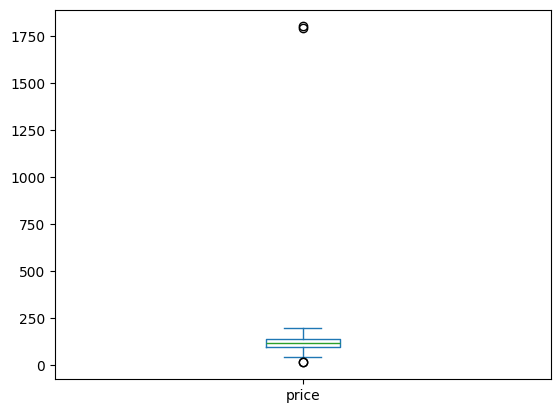

In [49]:
#price 컬럼 정보 확인
airbnb_df['price'].plot(kind='box')

In [50]:
#IQR 기반으로 price 컬럼의 이상치 처리

q3 = airbnb_df['price'].quantile(0.75)
q1 = airbnb_df['price'].quantile(0.25)

IQR = q3 - q1

upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

print('q3',q3,'q1',q1,'iqr',IQR,'upper_limit',upper_limit,'lower_limit',lower_limit)

#price컬럼에서 lower_limit보다 작고 upper_limit 큰 값이 있다면 제외, 사이 범위 값들만 필터

#이상치만 필터

mask = airbnb_df['price'] < lower_limit
mask2 = airbnb_df['price'] > upper_limit

airbnb_df[mask | mask2]

#이상치를 제외한 데이터 추출
#방법1 -> 위에서 필터한 조건의 부정형
outlier = airbnb_df[mask | mask2]
df_filter= airbnb_df[~(mask | mask2)]

# 방법 2 -> 새롭게 조건을 생성
mask3 = airbnb_df['price'] >= lower_limit
mask4 = airbnb_df['price'] <= upper_limit
df_filter2 = airbnb_df[mask3 | mask4]
df_filter2.shape



q3 139.0 q1 98.0 iqr 41.0 upper_limit 200.5 lower_limit 36.5


(713, 9)

### 실습) 이상점 처리하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6620)

In [51]:
# 데이터 불러오기
cellphone_df = pd.read_csv('/content/cellphone.csv')
cellphone_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/cellphone.csv'

In [ ]:
cellphone_df.shape

In [ ]:
# 상자 그림
sns.boxplot(cellphone_df['price'])
plt.show()

In [ ]:
# IQR 기반 이상점 확인하기
q3 = cellphone_df['price'].quantile(0.75)
q1 = cellphone_df['price'].quantile(0.25)

iqr = q3 - q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

# 정상 범위
condition1 = cellphone_df['price'] >= lower_limit
condition2 = cellphone_df['price'] <= upper_limit
cellphone_df = cellphone_df[condition1 & condition2]
cellphone_df

In [ ]:
cellphone_df.shape

In [ ]:
#선생님 코드

In [ ]:
"python".upper()

In [ ]:
#str 변수에 적용 가능한 빌드이 메소드들
string_variable = "python"
string_variable.upper()
string_variable.isnumeric()

In [ ]:
import pandas as pd
airbnb_df = pd.read_csv('/content/airbnb.csv')
airbnb_df.head(2)

In [ ]:
#state 컬럼을 대문자로 변경
#Series(하나의 열)을 호출하고 .str을 사용하면 string 빌트인 메소드를 모두 사용 가능

aribnb_df['state'] = airbnb_df['state'].str.upper()
airbnb_df['lower_str'] = airbnb_df['state'].str.lower()

In [ ]:
airbnb_df['state'].str.lower()

In [ ]:
airbnb_df['location']

# [3] 문자 데이터 가공하기

## (1) 대소문자 처리하기

1. **`.upper()`**: 문자열의 모든 문자를 **대문자**로 변환
   - 예: `"python".upper()` → `"PYTHON"`

2. **`.lower()`**: 문자열의 모든 문자를 **소문자**로 변환  
   - 예: `"PyThOn".lower()` → `"python"`

3. **`.capitalize()`**: 문자열의 맨 앞 글자만 **대문자**로, 나머지는 소문자로 변환  
   - 예: `"pyTHon".capitalize()` → `"Python"`


In [ ]:
# 데이터 불러오기
airbnb_df = pd.read_csv('/content/airbnb.csv')
airbnb_df.head()

In [ ]:
airbnb_df['state'].unique()

- `.upper()` : 문자열의 모든 문자를 대문자로 변환

In [ ]:
airbnb_df['state'].str.upper()

- `.lower()` : 문자열의 모든 문자를 소문자로 변환

In [ ]:
airbnb_df['state'].str.lower()

- `.capitalize()` : 문자열의 맨 앞 글자만 대문자로, 나머지는 소문자로 변환

In [ ]:
airbnb_df['state'].str.capitalize()

In [ ]:
airbnb_df['state'] = airbnb_df['state'].str.capitalize()
airbnb_df.head()

In [ ]:
airbnb_df['state'].unique()

## (2) 문자열 분리하기

- `split()`: 문자열 분리

In [ ]:
airbnb_df.head()

In [ ]:
airbnb_df['location'].str.split(',')

In [ ]:
#교수님 코드

In [ ]:
#공백을 기준으로 제거가 default / 특정 값을 기준으로 제겋고 싶으면 괄호입력
'test abc'.split(), 'test\nabc'.split('\n'), 'test,abc'.split(',')

In [ ]:
airbnb_df['location'].str.split(',').head(1) #각 행이 리스트로 표현

In [ ]:
airbnb_df['location'].str.split(',').vlaues #numpy array형식으로 변경
airbnb_df['location'].str.split(',').vlaues[0]
airbnb_df['location'].str.split(',').vlaues[0][0]
airbnb_df['location'].str.split(',').vlaues[0][1]

In [ ]:
#각 주의 이름만 추출 리스트의 두 번째 우너소만 가져오면 됨
airbnb_df['location'].str.split(',').str[1]

(location 열을 기반으로 neighborhood 열 생성하기)

In [ ]:
airbnb_df['neighborhood'] = airbnb_df['location'].str.split(',').str[0]
airbnb_df.head()

(location 열을 기반으로 city 열 생성하기)

In [ ]:
airbnb_df['city'] = airbnb_df['location'].str.split(',').str[1]
airbnb_df.head()

(neighborhood 열과 city 열 생성한 후 location 열 삭제하기)

In [ ]:
airbnb_df.drop(columns='location', inplace=True)

In [ ]:
airbnb_df.head()

## (3) 불필요한 문자 제거하기

- `replace()`: 문자열을 치환하는 함수
  - `regex`(`regular expression`): 정규 표현식
  - `regex=True`: 정규표현식 패턴 치환(기본값)
  - `regex=False`: 단순 문자 치환

In [ ]:
airbnb_df.head()

In [ ]:
airbnb_df['city'].unique()

(1단계: `strip()` 사용하여 `city` 앞에 있는 화이트 스페이스 제거) # 앞 뒤 공백을 제거

In [ ]:
airbnb_df['city'] = airbnb_df['city'].str.strip()

In [ ]:
airbnb_df['city'].unique()

(2단계: `replace()` 사용하여 각 도시 뒤에 있는 `.` 제거)

In [ ]:
airbnb_df['city'] = airbnb_df['city'].str.replace('.', '', regex=False)
airbnb_df.head()

In [ ]:
#airbnb_df['city'].str.strip().str.replace('.', '', regex=False)

In [ ]:
# 두가지 방식으로 사용
airbnb_df['city'].replace('Chicago.','_') #특정값을 가지느 ㄴ행을 모두 변경
airbnb_df['city'] = airbnb_df['city'].str.replace('.','') # 개별 행 단위로 변경


In [ ]:
airbnb_df['city'] = airbnb_df['city'].str.replace('','_')

In [ ]:
#contains : 특정 문자열의 포함여부를 불리언으로 표기/ 필터할 때 많이 사용
#Q : neighborhood 컬럼에서 ㄱRoxbury값이 들어가 있는 행을 필터하고 시플때
mask = airbnb_df['neighborhood'].str.contains('Roxbury')
airbnb.df[mask]

#Q : neighborhood 컬럼에서 Roxbury값이 들어가 있는 행의 모든 neighborhood 값을 RX로 변경
mask = airbnb_df['neighborhood'].str.contains('Roxbury')
airbnb_df.loc[mask,'neighborhood'] = 'RX'
airbnb_df[mask] #Roxbury행이 없음


In [ ]:
airbnb_df.head(1)

In [ ]:
abcdefg [:3] # 대괄호로와 콜론으로 슬라이싱

In [ ]:
# string의 인덱싱
# 1d 컬럼의 앞 2문자 / 뒷 4문자를 별도로 필터
airbnb_df ['id_front'] = airbnb_df ['id'].str[:2]
airbnb_df ['id_back'] = airbnb_df ['id'].str[-4:]
airbnb_df[['id','id_front','id_back']].head(2) # 대괄호 2개는 여러개의 컬럼을 필터

In [ ]:
# 타입 변경 -> astype('str') / astype('float') / astype('int')
# astype('str')을 통해 타입변경을 하면.str 문법을 사용할 수 있다

In [ ]:
airbnb_df ['price'].astype('str').head (1)

### 실습) 문자 데이터 처리하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6624)

In [ ]:
# 데이터 불러오기
cellphone_df = pd.read_csv('/content/cellphone.csv')
cellphone_df.head()

In [ ]:
# 대소문자 표기 통일하기

In [ ]:
cellphone_df['brand'].unique()

In [ ]:
cellphone_df['brand'] = cellphone_df['brand'].str.capitalize()

In [ ]:
cellphone_df['brand'].unique()

In [ ]:
# model 컬럼 생성하기
cellphone_df['model'] = cellphone_df['name'].str.split('(').str[0].str.strip()

In [ ]:
# capacity 컬럼 생성하기
cellphone_df['capacity'] = cellphone_df['name'].str.split('(').str[1].str.replace(')', '')

In [ ]:
# name 컬럼 삭제하기
cellphone_df.drop(columns='name', inplace=True)

In [ ]:
# size 컬럼 숫자형으로 바꾸기
cellphone_df['size'] = cellphone_df['size'].str.replace('"', '').astype(float)

In [ ]:
cellphone_df.head()

In [ ]:
#선생님 코드
# 브랜드 컬럼에 표기된 방식 확인
print(df ['brand']. unique ())
df ['brand' ]. value_counts()

# 대문자로 표기
df ['brand'] = df ['brand'].str. upper()
print(df ['brand']. unique())

#df['name'J.str.split(' (') # 에러이유 : 호를 정규표현식으로 인식했기 때문
df['name'].str.split(' (',regex=False)#정규표현식을 끄거나 / 자르고자하는 문자 앞에 백슬래시
df ['name']str.split(' \(')

# 구분자로 모두 다 2개로 나누어졌는지 확인
df['name'].str.split(' \(').st.len().unique() # 리스트의 원소 수를 확인하여 유니크값 출력

# 모델명은 modeL 컬럼, 용량은 capacity 컬럼에 저장하고, 기존의 name 컬럼은 삭제하면 됩니다.
df ['model '] = df ['name'].str.split(' \(').str[O]
df ['capacity'] = df['name '].str.split(' \(').str[1]
df ['capacity'] = df['capacity'].str.replace(')','')
# name 컬럼제거
df = df. drop(columns = [' name']) # 1
#df. drop(columns = [' name'], inplace True) # 2
#df = df.drop(columns = 'name') # 3

# size 컬럼 전처리
# df['size'].str|:-1] .astype('float') # 1
df ['size'] = df ['size'].str.replace('"','').astype('float') #2/ 큰따옴표를 감싸기 위해 작은 따옴표 사용
df ['size']. head (1)

# [4] 숫자 데이터 가공하기

## (1) 새로운 컬럼 생성하기

In [ ]:
# 데이터 불러오기
patient_df = pd.read_csv('/content/patient.csv')
patient_df.head()

In [ ]:
patient_df['waist_hip_ratio'] = round(patient_df['waist'] / patient_df['hip'], 2)
patient_df.head()

In [ ]:
#선생님 코드
df = pd. read_csv('./data/patient.csv')
# df.dtypes
df = ['waist_hip_ratio'] = round(df ['waist'] / df['hip'] , 3) #1
df = ['waist_hip_ratio'] = (df ['waist'] / df ['hip']). round (3) # 2
# bmi
# 무게(kg) / (키(m)**2)
df ['bmi'] = df ['weight'] / (df ['height']): 2   # 1
df ['bmi'] = df['weight']/ (df ['height'] * df['height']) # 1


### 실습) 새로운 값 계산하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6626)

In [ ]:
# 데이터 불러오기
patient_df = pd.read_csv('/content/patient.csv')
patient_df.head()

In [ ]:
patient_df['bmi'] = round(patient_df['weight'] / patient_df['height'] ** 2, 1)
patient_df.head()

## (2) 정규화

1. **스케일링(Scaling)**  
   - 숫자 데이터의 **단위나 범위를 일정하게 맞추는 과정**으로 서로 다른 단위를 가진 데이터를 비교 가능하게 만든다.

2. **정규화(Normalization)**  
   - 데이터를 **0과 1 사이 값**으로 변환하는 것으로 **Min-Max Normalization**이라고도 부른다.
   - 데이터의 최소값은 0, 최대값은 1로 맞추고 나머지 값들은 그 사이 비율에 맞게 변환한다.
   - 계산식:  
   $$
   \text{정규화} = \frac{(x - \min(x))}{\max(x) - \min(x)}
   $$

In [ ]:
patient_df.head()

In [ ]:
# patient_df에서 height 컬럼 정규화하기
patient_df['height'] = (patient_df['height'] - patient_df['height'].min()) / (patient_df['height'].max() - patient_df['height'].min())

In [ ]:
patient_df.head()

In [ ]:
# 정규화 확인
patient_df['height'].describe()

In [ ]:
#선생민 코드

import pandas as pd
df = pd. read_csv(' ../data/patient.csv')
df ['height_ minmax'] = (df ['height'] - df l'height'].min()) \
                      / (df ['height'].max() - df ['height'] -min())
# df['height' ] •plot(kind='box')
# df ['height_minmax' ]•plot(kind='box')

### 실습) 정규화

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6628)

In [ ]:
# 데이터 불러오기
patient_df = pd.read_csv('/content/patient.csv')
patient_df.head()

In [ ]:
# patient_df에서 weight 컬럼 정규화하기
patient_df['weight'] = (patient_df['weight'] - patient_df['weight'].min()) / (patient_df['weight'].max() - patient_df['weight'].min())

In [ ]:
patient_df['weight'].describe()

In [ ]:
patient_df.head()

## (3) 표준화

1. **표준화(Standardization, Standard Scaling)**  
   - 각 값이 **평균에 비해 얼마나 큰지 또는 작은지**를 나타내는 것으로 데이터를 변환했을 때 평균은 0, 분산은 1이 되도록 맞춘다.

2. **z-score 계산식**

$$
z = \frac{(x - \mu)}{\sigma}
$$

   - 데이터가 평균에서 **얼마나 떨어져 있는지(거리)**를 표준편차 단위로 표현한다.

In [ ]:
# 데이터 불러오기
patient_df = pd.read_csv('/content/patient.csv')
patient_df.head()

In [ ]:
# patient_df에서 height 컬럼 표준화하기
patient_df['height'] = (patient_df['height'] - patient_df['height'].mean()) / (patient_df['height'].std())

In [ ]:
# 표준화 확인 : 평균이 0, 표준편차가 1인 표준화
patient_df['height'].describe()

In [ ]:
#선생님 코드

df - pd. read_csv('../data/patient.csv')
df ['weight '] -mean ( )
df ['weight_sts'] = (df['weight'] - df ['weight ']. mean () )/ df ['weight'].std()
#df ['weight' ] plot (kind='hist' ,bins=20)
#df ['weight_sts'].plot(kind='hist' ,bins=20)

**데이터 스케일링 정리**

1. **정규화 (Normalization)**  
  - 모든 값을 0과 1 사이 값으로 변환하여 데이터의 최소값은 0, 최대값은 1이 되도록 조정  

2. **표준화 (Standardization)**  
  - 각 데이터가 평균에서 얼마나 떨어져 있는지를 비교하여 평균 = 0, 표준편차 = 1이 되도록 조정

### 실습) 표준화

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6630)

In [ ]:
# 데이터 불러오기
patient_df = pd.read_csv('/content/patient.csv')
patient_df.head()

In [ ]:
# patient_df에서 weight 컬럼 표준화
patient_df['weight'] = (patient_df['weight'] - patient_df['weight'].mean()) / (patient_df['weight'].std())

In [ ]:
# 표준화 확인 : 평균이 0, 표준편차가 1
patient_df['weight'].describe()

## (4) 데이터 구간화하기

- 데이터 구간화(binning): `cut()` 함수를 사용하여 수치형 데이터를 바탕으로 여러 개의 구간으로 구간화

**연속형 데이터를 범주형으로 구간화하기**

- `pd.cut()` 함수는 숫자 데이터를 특정 구간(bins)으로 나누어 범주형(label) 데이터로 변환할 때 사용  
  - `bins`: 나눌 구간 경계값을 리스트 형태로 지정  
  - `labels`: 각 구간에 붙일 이름을 지정  
  - `right=False`: 구간의 오른쪽 경계를 포함하지 않도록 설정(기본값은 `True`)  

**코드 예시**
```python
df['새로운_컬럼'] = pd.cut(df['숫자형_컬럼'],
                          bins=[경계1, 경계2, 경계3, ...],
                          right=False,
                          labels=['라벨1', '라벨2', '라벨3', ...])


In [ ]:
# 데이터 불러오기
patient_df = pd.read_csv('/content/patient.csv')
patient_df.head()

In [ ]:
patient_df['age'].describe()

In [ ]:
patient_df['age_group'] = pd.cut(patient_df['age'],
                                 bins=[20, 30, 40, 50, 60, 70])
patient_df.head()

- `pd.cut()`:
  - `right=True(기본값)`: 초과 이하
  - `right=False`: 이상 미만

In [ ]:
patient_df['age_group'] = pd.cut(patient_df['age'],
                                 bins=[20, 30, 40, 50, 60, 70],
                                 right=False)
patient_df.head()

In [52]:
patient_df['age_group'] = pd.cut(patient_df['age'],
                                 bins=[20, 30, 40, 50, 60, 70],
                                 right=False,
                                 labels=['20s', '30s', '40s', '50s', '60s'])
patient_df.head()

NameError: name 'patient_df' is not defined

### 실습) 데이터 구간화

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6632)

In [ ]:
import pandas as pd
import numpy as np

patient_df = pd.read_csv('/content/patient.csv')
patient_df['bmi'] = round(patient_df['weight'] / patient_df['height']**2, 1)
patient_df.head()

In [ ]:
patient_df['bmi'].describe()

In [ ]:
patient_df['obesity'] = pd.cut(patient_df['bmi'],
                               bins=[15, 18.5, 25, 30, 60],
                               right=False,
                               labels=['under', 'healthy', 'over', 'obese'])

In [ ]:
patient_df['obesity']

In [ ]:
patient_df.head()

## (5) apply() 함수 알아보기

- `apply()` : DataFrame이나 Series에 함수를 적용
- `lambda` : 이름 없는 간단한 함수를 정의할 때 사용  
- `apply(lambda ...)` : 간단한 함수를 즉석에서 만들어 각 요소나 행/열에 적용  

**사용 형태**

```python
df['새로운_컬럼'] = df['기존_컬럼'].apply(lambda x: 함수식(x))


(예시1)

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

In [ ]:
# 데이터 프레임 생성하기
df = pd.DataFrame([[1, 9], [4, 16]], columns=['column1', 'column2'])
df

In [53]:
np.sqrt(4)

NameError: name 'np' is not defined

In [ ]:
df['column2'].apply(np.sqrt)

(예시2)

In [ ]:
# 데이터 불러오기
patient_df = pd.read_csv('/content/patient.csv')
patient_df.head()

In [ ]:
def age_group(x):
    if (x >= 10) and (x < 20):
        return '10s'
    elif (x >= 20) and (x < 30):
        return '20s'
    elif (x >= 30) and (x < 40):
        return '30s'
    elif (x >= 40) and (x < 50):
        return '40s'
    elif (x >= 50) and (x < 60):
        return '50s'
    else:
        return '60s'

In [ ]:
patient_df['age_group'] = patient_df['age'].apply(age_group)
patient_df.head()

(예시3)

In [ ]:
lambda x: x * 2

In [ ]:
patient_df['height'].apply(lambda x: x * 2)

(예시4)

In [ ]:
patient_df.head()

In [ ]:
patient_df['bmi'] = round((patient_df['weight']) / (patient_df['height'] ** 2), 1)
patient_df.head()

In [ ]:
lambda x: 'Y' if x > 30 else 'N'

In [54]:
patient_df['bmi'].apply(lambda x: 'Y' if x > 30 else 'N')

NameError: name 'patient_df' is not defined

(예시5)

In [ ]:
def isin_interval(x, n_lower, n_upper):
    if n_lower <= x <= n_upper:
        return 'Y'
    else:
        return 'N'

In [ ]:
patient_df.head()

In [ ]:
patient_df['bmi'].apply(lambda x: isin_interval(x, 18.5, 25))

In [ ]:
patient_df['bmi'].apply(lambda x: isin_interval(x, 25, 30))

# [5] 날짜와 시간 데이터 다루기

## (1) 날짜 데이터 타입 설정하기

- `pd.to_datetime()`: 문자열이나 숫자 등 다양한 형태의 데이터를 날짜·시간(`datetime`) 객체로 변환하여 변환된 데이터는 시계열 분석, 시간 연산, 날짜 인덱싱 등에 활용할 수 있다.

In [ ]:
# 데이터 불러오기
order_df = pd.read_csv('/content/order.csv')
order_df.head()

In [ ]:
order_df.dtypes

In [ ]:
# 날짜 데이터 타입 설정하기
order_df['order_time'] = pd.to_datetime(order_df['order_time'])
order_df['shipping_time'] = pd.to_datetime(order_df['shipping_time'])

In [ ]:
order_df.dtypes

- `parse_dates` 옵션: 데이터를 불러올 때부터 지정한 컬럼으로 자동으로 날짜형으로 변환하여 불러올 수 있다.

In [ ]:
order_df = pd.read_csv('/content/order.csv', parse_dates=['order_time', 'shipping_time'])
order_df.dtypes

In [ ]:
order_df.head()

In [55]:
order_df.isna().sum()

NameError: name 'order_df' is not defined

In [ ]:
order_df.shape

In [ ]:
order_df.dropna(inplace=True)

In [ ]:
order_df.shape

In [ ]:
order_df.isna().sum()

In [ ]:
order_df['order_time'].dt.date

- `order_time`의 `year` 가져오기

In [ ]:
order_df['order_time'].dt.year

- `order_time`의 `month` 가져오기

In [ ]:
order_df['order_time'].dt.month

- `order_time`의 `day` 가져오기

In [ ]:
order_df['order_time'].dt.day

- `order_time`의 `day_of_week` 가져오기(0: 월요일, 6: 일요일)

In [ ]:
order_df['order_time'].dt.day_of_week

## (2) 날짜 데이터 형식 지정하기

In [ ]:
order_df.head()

In [ ]:
order_df['order_time'] = order_df['order_time'].dt.strftime('%Y년 %m월 %d일 %H시 %M분 %S초')
order_df['shipping_time'] = order_df['shipping_time'].dt.strftime('%Y년 %m월 %d일 %H시 %M분 %S초')
order_df.head()

### 실습) 날짜와 시간 데이터 인덱싱하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/8315)

In [ ]:
# 데이터 불러오기
delivery_df = pd.read_csv('/content/delivery.csv')
delivery_df.head()

In [ ]:
delivery_df.dtypes

(방법1) 2022-10-17 지정하기

In [ ]:
delivery_df['order_time'] = pd.to_datetime(delivery_df['order_time'])

In [ ]:
delivery_df.dtypes

In [ ]:
pd.to_datetime('2022-10-17').date()

In [ ]:
delivery_df[delivery_df['order_time'].dt.date == pd.to_datetime('2022-10-17').date()]

(방법2) 2022년, 10월, 17일 `&` 조건으로 지정하기

In [ ]:
# 데이터 불러오기
delivery_df = pd.read_csv('/content/delivery.csv')
delivery_df.head()

In [ ]:
delivery_df.dtypes

In [ ]:
delivery_df['order_time'] = pd.to_datetime(delivery_df['order_time'])

In [ ]:
delivery_df.dtypes

In [ ]:
delivery_df[(delivery_df['order_time'].dt.year == 2022)
            & (delivery_df['order_time'].dt.month == 10)
            & (delivery_df['order_time'].dt.day == 17)]

(방법3) 부분 문자열 인덱싱 사용하기

In [ ]:
# 데이터 불러오기
delivery_df = pd.read_csv('/content/delivery.csv')
delivery_df.head()

In [ ]:
delivery_df.dtypes

In [56]:
delivery_df['order_time'] = pd.to_datetime(delivery_df['order_time'])

NameError: name 'delivery_df' is not defined

In [ ]:
delivery_df.dtypes

In [ ]:
delivery_df.set_index('order_time', inplace=True)

In [ ]:
delivery_df.head()

In [ ]:
delivery_df.loc['2022-10-17']

## (3) 날짜와 시간을 더하고 빼기

In [ ]:
# 데이터 불러오기
order_df = pd.read_csv('/content/order.csv')
order_df.head()

In [ ]:
order_df.dtypes

In [ ]:
order_df['order_time'] = pd.to_datetime(order_df['order_time'])
order_df['shipping_time'] = pd.to_datetime(order_df['shipping_time'])

In [ ]:
order_df.dtypes

In [ ]:
order_df.head()

In [57]:
order_df['shipping_time'] - order_df['order_time']

NameError: name 'order_df' is not defined

- 인덱스로 지정하고 난 이후에도 컬럼과 인덱스 간 연산이 가능하다.

In [ ]:
order_df.set_index('order_time', inplace=True)
order_df.head()

- `timedelta`는 두 시점 간의 시간 차를 의미

In [58]:
order_df['shipping_time'] - order_df.index

NameError: name 'order_df' is not defined

In [ ]:
order_df['days_for_shipping(actual)'] = order_df['shipping_time'] - order_df.index

In [ ]:
order_df.head()

In [ ]:
order_df.dtypes

In [ ]:
order_df['days_for_shipping(expected)'] = pd.to_timedelta(order_df['days_for_shipping(expected)'], unit='D')  # unit='D' : Day

In [ ]:
order_df.dtypes

In [ ]:
order_df.head()

In [ ]:
order_df['late_shipping'] = order_df['days_for_shipping(actual)'] > order_df['days_for_shipping(expected)']

In [ ]:
order_df.head()

In [ ]:
order_df['late_shipping'].value_counts()

In [59]:
order_df['late_shipping'].value_counts(normalize=True)

NameError: name 'order_df' is not defined

In [ ]:
order_df[order_df['late_shipping'] == True]

### 실습) 날짜와 시간을 더하고 빼기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/8317)


In [ ]:
# 데이터 불러오기
import pandas as pd

delivery_df = pd.read_csv('/content/delivery.csv', parse_dates=['order_time'])
delivery_df.head()

In [ ]:
delivery_df.dtypes

In [ ]:
delivery_df['time_taken'] = pd.to_timedelta(delivery_df['time_taken'], unit='min')

In [60]:
delivery_df.dtypes

NameError: name 'delivery_df' is not defined

In [ ]:
delivery_df['delivery_time'] = delivery_df['order_time'] + delivery_df['time_taken']

In [ ]:
delivery_df.head()

# [6] 데이터 합치기

## (1) concat(): 같은 형식의 데이터 합치기

- `pandas`에 있는 `concat()`을 사용하는데 리스트 안에 합치려는 데이터 프레임을 넣으면 된다.
  - `ignore_index=True`는 데이터프레임을 합치거나 재구성할 때 기존 인덱스를 무시하고 0부터 다시 번호를 매기는 옵션

In [ ]:
english_df1 = pd.DataFrame({
    'name' : ['A', 'B', 'C'],
    'english_score' : [50, 89, 68]
})

english_df2 = pd.DataFrame({
    'name' : ['D', 'E', 'F'],
    'english_score' : [88, 91, 72]
})

In [61]:
english_df1

NameError: name 'english_df1' is not defined

In [ ]:
english_df2

In [ ]:
pd.concat([english_df1, english_df2])

- `ignore_index=True` : 데이터프레임을 합치거나 재구성할 때 기존 인덱스를 무시하고 0부터 다시 번호를 매기는 옵션

In [ ]:
english_df = pd.concat([english_df1, english_df2], ignore_index=True)
english_df

In [ ]:
math_df = pd.DataFrame({
    'name' : ['A', 'B', 'C', 'D', 'E', 'F'],
    'math_score' : [86, 31, 91, 75, 68, 80]
})

math_df

In [ ]:
pd.concat([english_df, math_df])

In [ ]:
pd.concat([english_df, math_df], axis=1)

### 실습) concat()

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6604)

In [ ]:
# 데이터 불러오기
import pandas as pd

sales_2020_df = pd.read_csv('/content/sales_2020.csv')
sales_2021_df = pd.read_csv('/content/sales_2021.csv')
sales_2022_df = pd.read_csv('/content/sales_2022.csv')

In [ ]:
sales_2020_df.head()

In [ ]:
sales_2021_df.head()

In [62]:
sales_2022_df.head()

NameError: name 'sales_2022_df' is not defined

In [ ]:
sales_df = pd.concat([sales_2020_df, sales_2021_df, sales_2022_df])
sales_df

## (2) merge(): 컬럼 기준 데이터 합치기

**조인 연산(Join)**

- 두 데이터셋에 공통으로 존재하는 값을 기준(Key)으로 데이터를 하나로 합치는 것으로 Key(키)는 데이터 간 연결고리 역할을 하는 기준 값이다.(예: 고객 ID, 주문 번호 등)

- **조인의 종류**  
  - Inner Join(기본값) : 두 데이터 모두에 존재하는 키만 결합
  - Left Outer Join : 왼쪽 데이터는 모두 살리고, 오른쪽 데이터에서 일치하는 키만 결합  
  - Right Outer Join : 오른쪽 데이터는 모두 살리고, 왼쪽 데이터에서 일치하는 키만 결합  
  - Full Outer Join : 양쪽 데이터의 모든 키를 포함해 결합  

- **실무 활용**  
  - 주로 **Inner Join**과 **Left Outer Join**이 많이 사용된다.


In [ ]:
# 데이터 불러오기
employee_df = pd.read_csv('/content/employee.csv')
survey_df = pd.read_csv('/content/survey.csv')

In [ ]:
employee_df.head()

In [ ]:
survey_df.head()

- `employee`와 `survey` 두 테이블을 연결하려고 할 때 연결 고리는 중복값이 없고 결측치가 없는 값이 보통 키 값이 된다. (예: 주민등록번호 등)

In [63]:
employee_df['id'].count(), employee_df['id'].nunique(), employee_df['id'].isna().sum()

NameError: name 'employee_df' is not defined

In [ ]:
survey_df['id'].count(), survey_df['id'].nunique(), survey_df['id'].isna().sum()

In [ ]:
pd.merge(employee_df, survey_df, on='id', how='inner')

- `how='left'` : Excel에서의 `VLOOKUP`과 같은 역할

In [ ]:
pd.merge(employee_df, survey_df, on='id', how='left')

- `how='right'`

In [ ]:
pd.merge(employee_df, survey_df, on='id', how='right')

- `how='outer'`
  - `department_x`, `department_y` : 똑같은 이름을 가진 컬럼 뒤에는 자동으로 `_x`와 `_y`가 붙는다.

In [ ]:
pd.merge(employee_df, survey_df, on='id', how='outer')

- `_x`와 `_y`를 없애고 싶을 때 `suffix`(접미사)를 사용하면 된다.

In [ ]:
pd.merge(employee_df, survey_df, on='id', how='outer', suffixes=('_left', '_right'))

(두 테이블의 연결고리인 Key값이 다른 경우)

In [64]:
survey_df.rename(columns={'id' : 'employee_id'}, inplace=True)

NameError: name 'survey_df' is not defined

In [ ]:
survey_df.head()

In [ ]:
employee_df.head()

In [ ]:
company_df = pd.merge(employee_df, survey_df, left_on='id', right_on='employee_id', how='left')
company_df

### 실습) merge()

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6636)

In [ ]:
# 데이터 불러오기
import pandas as pd

asteroid_df = pd.read_csv('/content/asteroid.csv')
orbit_df = pd.read_csv('/content/orbit.csv')

In [ ]:
asteroid_df.head()

In [ ]:
orbit_df.head()

In [ ]:
nasa_df = pd.merge(asteroid_df, orbit_df, left_on='id', right_on='asteroid_id', how='inner')
nasa_df

In [ ]:
help(pd.merge)

## (3) join(): 인덱스 기준 데이터 합치기

In [65]:
employee_df.set_index('id', inplace=True)

NameError: name 'employee_df' is not defined

In [ ]:
employee_df.head()

In [ ]:
survey_df.set_index('employee_id', inplace=True)

In [ ]:
survey_df.head()

In [ ]:
employee_df.join(survey_df, lsuffix='_x', rsuffix='_y')

In [ ]:
employee_df.join(survey_df, lsuffix='_x', rsuffix='_y', how='inner')

### 실습) join()

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6638)

In [ ]:
# 데이터 불러오기
import pandas as pd

asteroid_df = pd.read_csv('/content/asteroid.csv', index_col='id')
orbit_df = pd.read_csv('/content/orbit.csv', index_col='asteroid_id')

In [ ]:
asteroid_df.head()

In [ ]:
orbit_df.head()

In [ ]:
nasa_df = asteroid_df.join(orbit_df, how='inner')
nasa_df.head()

## (4) merge() vs. join()

- `merge()` : 컬럼명을 기준으로 데이터를 합치는 것
- `join()` : 인덱스를 기준으로 데이터를 합치는 것
- 그런데 그 반대의 경우도 가능은 하다.

In [ ]:
employee_df.head()

In [ ]:
survey_df.head()

(`merge()`로 합치기: 인덱스를 기준으로 합치는 경우)

In [ ]:
pd.merge(employee_df, survey_df, left_index=True, right_index=True)

(`join()`으로 합치기: 하나는 컬럼, 하나는 인덱스인 경우)

In [ ]:
employee_df.reset_index(inplace=True)

In [ ]:
employee_df.head()

In [66]:
survey_df.head()

NameError: name 'survey_df' is not defined

In [ ]:
employee_df.join(survey_df, on='id', lsuffix='_x', rsuffix='_y')

## (5) 조인한 데이터로 새로운 인사이트 얻기

- `employee_df`와 `survey_df`를 합친 `company_df`로 퇴사한 사람에 대한 정보를 얻을 수 있다.

In [ ]:
company_df.head()

In [ ]:
company_df['resign'].value_counts(normalize=True)

In [ ]:
# 퇴사한 직원들
condition = (company_df['resign'] == 'Y')
company_df[condition].head()

- 퇴사한 직원들과 퇴사하지 않은 직원들의 정보를 비교하면, 5점 척도 설문조사인데, 커리어, 팀워크, 보상, 환경 모든 면에서 퇴사하지 않은 직원들의 평균 만족도가 퇴사한 직원들보다 전반적으로 더 높은 것을 확인할 수 있다.

In [ ]:
# 퇴사한 직원들
company_df[condition].describe()

In [67]:
# 퇴사하지 않은 직원들
company_df[~condition].describe()

NameError: name 'company_df' is not defined

# [7] 그룹별로 분석하기

## (1) groupby

- 그룹별로 분석할 때는 `groupby`를 사용할 수 있다.

In [ ]:
# 데이터 불러오기
netflix_df = pd.read_csv('/content/netflix.csv')
netflix_df.head()

In [ ]:
netflix_df.info()

In [ ]:
netflix_df.groupby(['genre']).count()

In [ ]:
netflix_df.groupby(['genre']).size()

In [ ]:
netflix_df.groupby(['genre']).min(numeric_only=True)

In [ ]:
netflix_df.groupby(['genre']).max(numeric_only=True)

- 다큐멘터리가 평균 런타임은 짧지만, 평점은 높은 것을 알 수 있다.

In [ ]:
netflix_df.groupby(['genre']).mean(numeric_only=True)

In [ ]:
netflix_df.groupby(['genre']).sum(numeric_only=True)

In [ ]:
netflix_df.head()

In [ ]:
netflix_df.groupby(['genre'])['score'].mean()

### 실습) groupby

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6595)

In [ ]:
# 데이터 불러오기
olympic_df = pd.read_csv('/content/olympic.csv')
olympic_df.head()

In [68]:
# 각 종목별로 메달리스트들의 평균 키와 체중
olympic_df.groupby(['sport'])[['height', 'weight']].mean()

NameError: name 'olympic_df' is not defined

## (2) 범주형 데이터 타입 다루기

In [ ]:
clothes_df = pd.DataFrame({
    'size' : ['L', 'S', 'XS', 'L', 'S', 'XL', 'L', 'S', 'M', 'XS', 'M', 'M', 'XS', 'L', 'XL', 'XS', 'M', 'S', 'L', 'XL'],
    'sales' : [130, 200, 120, 120, 140, 160, 190, 90, 110, 100, 150, 180, 100, 200, 80, 140, 150, 90, 80, 130]
})

clothes_df

In [69]:
clothes_df.info()

NameError: name 'clothes_df' is not defined

In [ ]:
clothes_df['size'] = pd.Categorical(clothes_df['size'], ordered=True, categories=['XS', 'S', 'M', 'L', 'XL'])

In [ ]:
clothes_df.info()

In [ ]:
clothes_df.head()

In [ ]:
clothes_df.sort_values(by='size')

In [ ]:
clothes_df.groupby(['size'])['sales'].mean()

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# help(sns.barplot)

In [ ]:
sns.barplot(data=clothes_df, x='size', y='sales', errorbar=None)  # estimator='mean'(default)
plt.show()

In [ ]:
sns.barplot(data=clothes_df, x='size', y='sales', estimator='sum', errorbar=None)
plt.show()

## (3) groupby와 멀티 인덱스

In [70]:
# 데이터 불러오기
netflix_df = pd.read_csv('/content/netflix.csv')
netflix_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/netflix.csv'

In [ ]:
netflix_df.info()

- `release`라는 개봉일이 문자형 데이터로 되어 있으므로 날짜형 데이터로 바꾼다.

In [ ]:
netflix_df['release'] = pd.to_datetime(netflix_df['release'])

In [ ]:
netflix_df.info()

- `release`라는 개봉일 컬럼이 날짜형으로 변환이 되었으므로 `year` 컬럼을 생성할 수 있다.

In [ ]:
netflix_df['year'] = netflix_df['release'].dt.year

In [ ]:
netflix_df.head()

In [ ]:
# 장르별 연도별 평균 런타임과 평점
netflix_df.groupby(['genre', 'year'])[['runtime', 'score']].mean()

In [ ]:
netflix_df.groupby(['genre', 'year']).mean(numeric_only=True)

In [ ]:
# 연도별 장르별 평균 런타임과 평점
netflix_df.groupby(['year', 'genre']).mean(numeric_only=True)

(2020년 데이터인 경우)

In [ ]:
netflix_df.groupby(['year', 'genre']).mean(numeric_only=True).loc[2020]

In [ ]:
netflix_df.groupby(['year', 'genre']).mean(numeric_only=True).loc[2020, :]

(2020년 드라마인 경우)

In [ ]:
netflix_df.groupby(['year', 'genre']).mean(numeric_only=True).loc[2020, 'Drama']

(2020년 드라마와 코미디인 경우)

In [71]:
netflix_df.groupby(['year', 'genre']).mean(numeric_only=True).loc[2020, ['Drama', 'Comedy'], :]

NameError: name 'netflix_df' is not defined

In [ ]:
netflix_df.groupby(['year', 'genre']).mean(numeric_only=True).loc[(2020, ['Drama', 'Comedy']), :]

(2019년, 2020년, 2021년의 드라마인 경우)

In [ ]:
netflix_df.groupby(['year', 'genre']).mean(numeric_only=True).loc[(2019, 2020, 2021), 'Drama', :]

(연도가 많은 경우)

- 만약에 연도가 2019년, 2020년, 2021년이 아니라 많다면 일일이 적어주기 번거로우므로 years 변수를 생성해서 작업한다.

In [72]:
netflix_df.head()

NameError: name 'netflix_df' is not defined

In [ ]:
years = sorted(netflix_df['year'].unique())

In [ ]:
netflix_df.groupby(['year', 'genre']).mean(numeric_only=True).loc[years, 'Drama', :]

### 실습) groupby와 멀티 인덱스

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6598)

In [ ]:
# 데이터 불러오기
olympic_df = pd.read_csv('/content/olympic.csv')
olympic_df.head()

In [ ]:
olympic_df.groupby(['sport', 'sex'])[['height', 'weight']].mean()

## (4) 다양한 통계값 계산하기

In [ ]:
# 데이터 불러오기
netflix_df = pd.read_csv('/content/netflix.csv')
netflix_df.head()

In [ ]:
netflix_df.info()

1. 합계 계산

In [ ]:
netflix_df.groupby(['genre']).sum(numeric_only=True)

In [ ]:
netflix_df.head()

2. 평균 계산

(방법1)

In [73]:
netflix_df.groupby(['genre'])['score'].mean()

NameError: name 'netflix_df' is not defined

(방법2 : `agg`(`aggregation`) 사용)

In [ ]:
netflix_df.groupby(['genre'])['score'].agg('mean')

3. 합계와 평균 계산

- 합계와 평균을 따로 구하는 대신에 한번에 여러 가지 통계량을 구하고 싶을 때에는 `agg` 안에 구하고 싶은 것을 모두 입력하면 된다.

In [ ]:
netflix_df.groupby(['genre'])['score'].agg(['mean', 'min', 'max'])

In [ ]:
netflix_df.head()

In [ ]:
netflix_df.groupby(['genre']).agg({'score' : 'mean', 'runtime' : ['min', 'max']})

### 실습) 다양한 통계값 계산하기

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6600)

In [ ]:
olympic_df = pd.read_csv('/content/olympic.csv')
olympic_df.head()

In [ ]:
# 운동 종목별 나이의 최솟값, 최댓값
olympic_df.groupby(['sport'])['age'].agg(['min', 'max'])

## (5) 피벗 테이블

**피벗 테이블(Pivot Table)**

- 피벗 테이블은 데이터를 집계·요약하여 한눈에 보기 쉽게 만드는 표
- `pandas`의 `pivot_table()` 함수를 활용해 다양한 형태로 표 생성 가능
- 인덱스와 컬럼을 활용해 데이터 구조화

```python
pd.pivot_table(데이터프레임, values='계산할 컬럼', index='행기준', columns='열기준')
```

In [74]:
netflix_df.head()

NameError: name 'netflix_df' is not defined

In [ ]:
netflix_df.info()

In [ ]:
netflix_df['release'] = pd.to_datetime(netflix_df['release'])

In [ ]:
netflix_df.info()

In [ ]:
netflix_df['year'] = netflix_df['release'].dt.year

In [ ]:
netflix_df.head()

In [ ]:
# 연도별 장르별 평점
netflix_df.groupby(['year', 'genre'])['score'].mean()

```python
pd.pivot_table(데이터프레임, values='계산할 컬럼', index='행기준', columns='열기준')
```

In [ ]:
pd.pivot_table(netflix_df, values='score', index='year', columns='genre')

In [ ]:
pd.pivot_table(netflix_df, values='score', index='year', columns='genre', aggfunc='max')

In [ ]:
pd.pivot_table(netflix_df, values='score', index='year', columns='genre', aggfunc=['mean', 'min', 'max'])

### 실습) 피벗 테이블

[링크](https://www.codeit.kr/topics/mastering-dataframe/lessons/6602)

In [ ]:
# 데이터 불러오기
olympic_df = pd.read_csv('/content/olympic.csv')
olympic_df.head()

```python
pd.pivot_table(데이터프레임, values='계산할 컬럼', index='행기준', columns='열기준')
```

In [ ]:
# 피벗 테이블로 국가별 금메달, 은메달, 동메달의 개수
pd.pivot_table(olympic_df,
               index='team',
               columns='medal',
               aggfunc='size').fillna(0).sort_values(by=['1st', '2nd', '3rd', 'team'], ascending=False)

## (6) 원하는 시간 간격으로 묶기

In [ ]:
# 데이터 불러오기
order_df = pd.read_csv('/content/order.csv', parse_dates=['order_time', 'shipping_time'])
order_df.head()

In [75]:
order_df.info()

NameError: name 'order_df' is not defined

In [ ]:
# 결측치 확인하기
order_df.isna().sum().sum()

In [ ]:
order_df.isna().sum()

In [ ]:
order_df.dropna(inplace=True)

In [ ]:
order_df.isna().sum()

In [ ]:
order_df.set_index('order_time', inplace=True)

In [ ]:
order_df.head()

In [ ]:
# 일(Day)을 기준으로 리샘플링
order_df.resample('D').sum(numeric_only=True)

In [ ]:
# 월을 기준으로 리샘플링
order_df.resample('ME').sum(numeric_only=True)

In [ ]:
# 연도를 기준으로 리샘플링
order_df.resample('YE').sum(numeric_only=True)